# Automobile Market Analysis - Business Insights

**Executive Dashboard Version**  
*For stakeholders, executives, and business decision makers*

---

## Objective
Analyze automobile market data to identify pricing strategies, market opportunities, and consumer preferences that drive business value.

## Dataset Overview
- **Records**: 11,914 vehicles (cleaned: 10,925)
- **Features**: Price, MPG, Performance, Brand, Vehicle Type
- **Coverage**: Major automotive brands and segments
- **Quality**: 92% data retention after cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

df = pd.read_csv("data.csv")
print(f"Dataset loaded: {df.shape[0]} vehicles, {df.shape[1]} features")

Dataset loaded: 11914 vehicles, 16 features


## 📊 Key Business Metrics

In [12]:
df = df.drop_duplicates()
df['Market Category'] = df['Market Category'].fillna('Unknown')
df = df.dropna()
df = df.drop(df[df['Transmission Type'].str.lower() == 'unknown'].index)
df.rename(columns={'highway MPG': 'Highway MPG', 'city mpg': 'City MPG', 'Driven_Wheels': 'Driven Wheels'}, inplace=True)
df = df[(df['Engine Cylinders'] > 0)]
df = df[(df['MSRP'] >= 1000) & (df['MSRP'] <= 500000)]
df = df[df['Highway MPG'] >= df['City MPG']]
df = df[df['Highway MPG'] < 60]
df['Average MPG'] = (0.6 * df['Highway MPG'] + 0.4 * df['City MPG'])

print(f"After cleaning: {df.shape[0]} vehicles")

After cleaning: 10904 vehicles


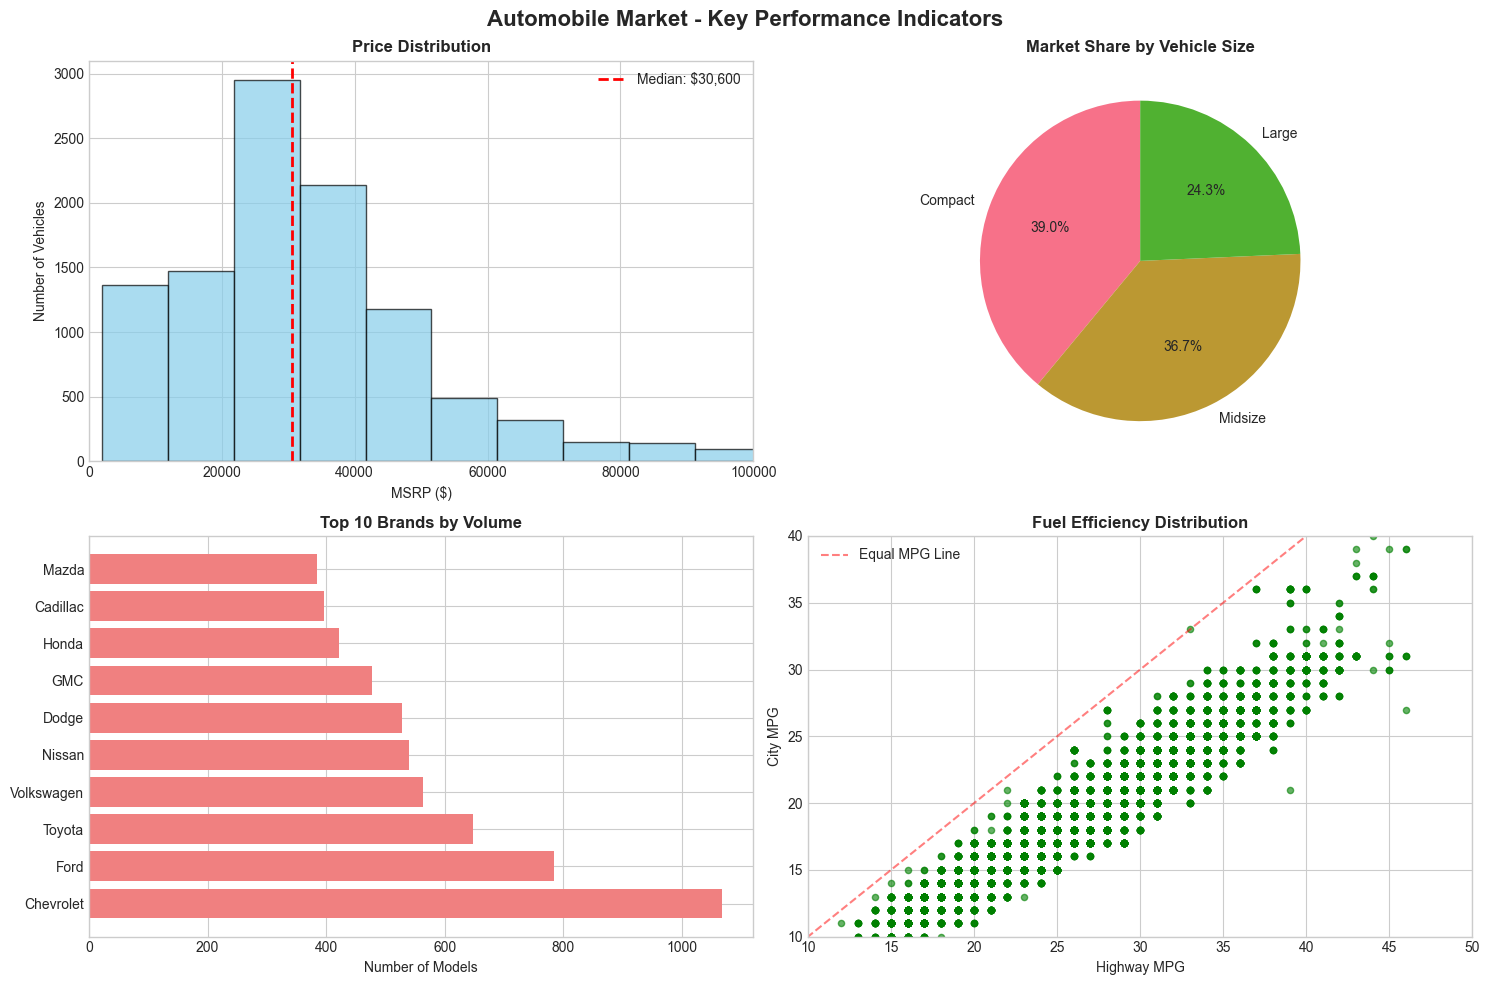

In [13]:
# Business KPIs Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Automobile Market - Key Performance Indicators', fontsize=16, fontweight='bold')

# Price Distribution
axes[0,0].hist(df['MSRP'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['MSRP'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: ${df["MSRP"].median():,.0f}')
axes[0,0].set_title('Price Distribution', fontweight='bold')
axes[0,0].set_xlabel('MSRP ($)')
axes[0,0].set_ylabel('Number of Vehicles')
axes[0,0].legend()
axes[0,0].set_xlim(0, 100000)

# Market Share by Vehicle Size
size_counts = df['Vehicle Size'].value_counts()
axes[0,1].pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Market Share by Vehicle Size', fontweight='bold')

# Top 10 Brands by Volume
top_brands = df['Make'].value_counts().head(10)
axes[1,0].barh(range(len(top_brands)), top_brands.values, color='lightcoral')
axes[1,0].set_yticks(range(len(top_brands)))
axes[1,0].set_yticklabels(top_brands.index)
axes[1,0].set_title('Top 10 Brands by Volume', fontweight='bold')
axes[1,0].set_xlabel('Number of Models')

# Fuel Efficiency Overview
axes[1,1].scatter(df['Highway MPG'], df['City MPG'], alpha=0.6, color='green', s=20)
axes[1,1].plot([0, 50], [0, 50], 'r--', alpha=0.5, label='Equal MPG Line')
axes[1,1].set_title('Fuel Efficiency Distribution', fontweight='bold')
axes[1,1].set_xlabel('Highway MPG')
axes[1,1].set_ylabel('City MPG')
axes[1,1].legend()
axes[1,1].set_xlim(10, 50)
axes[1,1].set_ylim(10, 40)

plt.tight_layout()
plt.show()

## 💰 Pricing Strategy Analysis

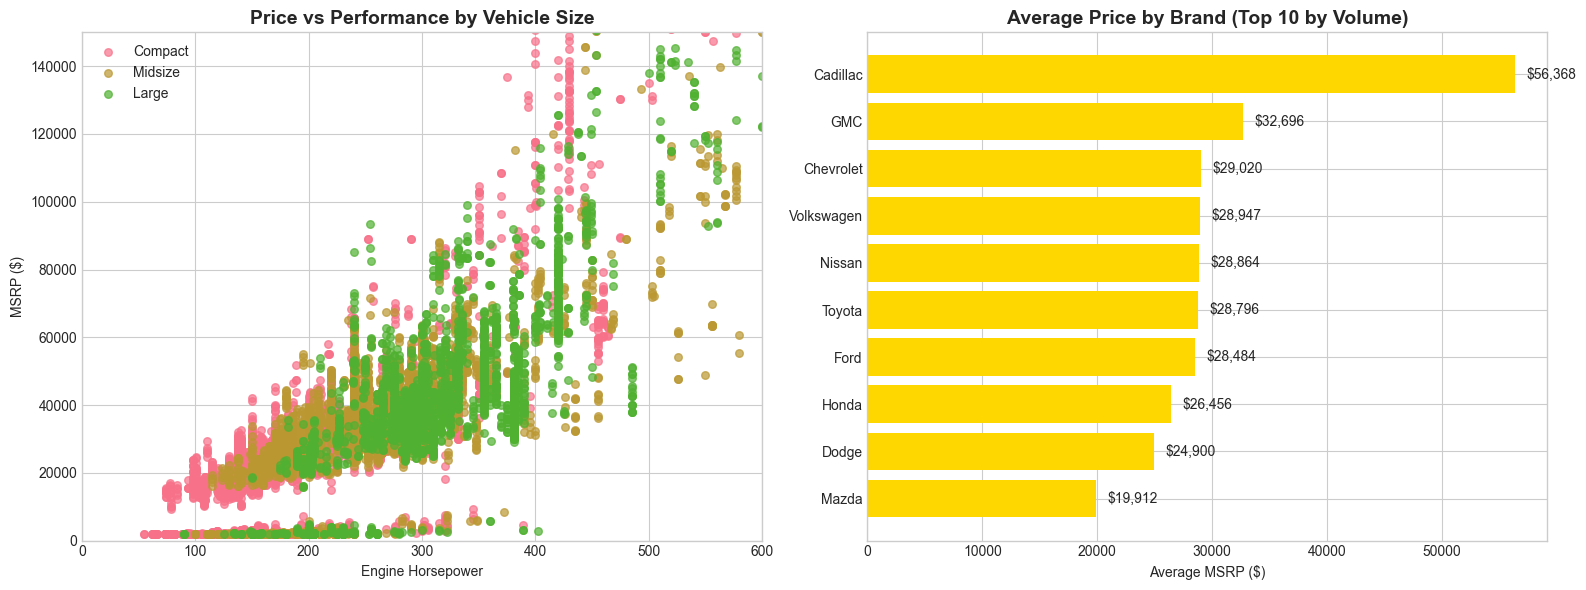

In [5]:
# Price vs Performance Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Price vs Horsepower by Vehicle Size
for size in df['Vehicle Size'].unique():
    subset = df[df['Vehicle Size'] == size]
    axes[0].scatter(subset['Engine HP'], subset['MSRP'], label=size, alpha=0.7, s=30)
axes[0].set_title('Price vs Performance by Vehicle Size', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Engine Horsepower')
axes[0].set_ylabel('MSRP ($)')
axes[0].legend()
axes[0].set_xlim(0, 600)
axes[0].set_ylim(0, 150000)

# Average Price by Brand (Top 10)
top_10_brands = df['Make'].value_counts().head(10).index
brand_prices = df[df['Make'].isin(top_10_brands)].groupby('Make')['MSRP'].mean().sort_values(ascending=True)
axes[1].barh(range(len(brand_prices)), brand_prices.values, color='gold')
axes[1].set_yticks(range(len(brand_prices)))
axes[1].set_yticklabels(brand_prices.index)
axes[1].set_title('Average Price by Brand (Top 10 by Volume)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Average MSRP ($)')

# Add value labels
for i, v in enumerate(brand_prices.values):
    axes[1].text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## ⛽ Efficiency vs Premium Positioning

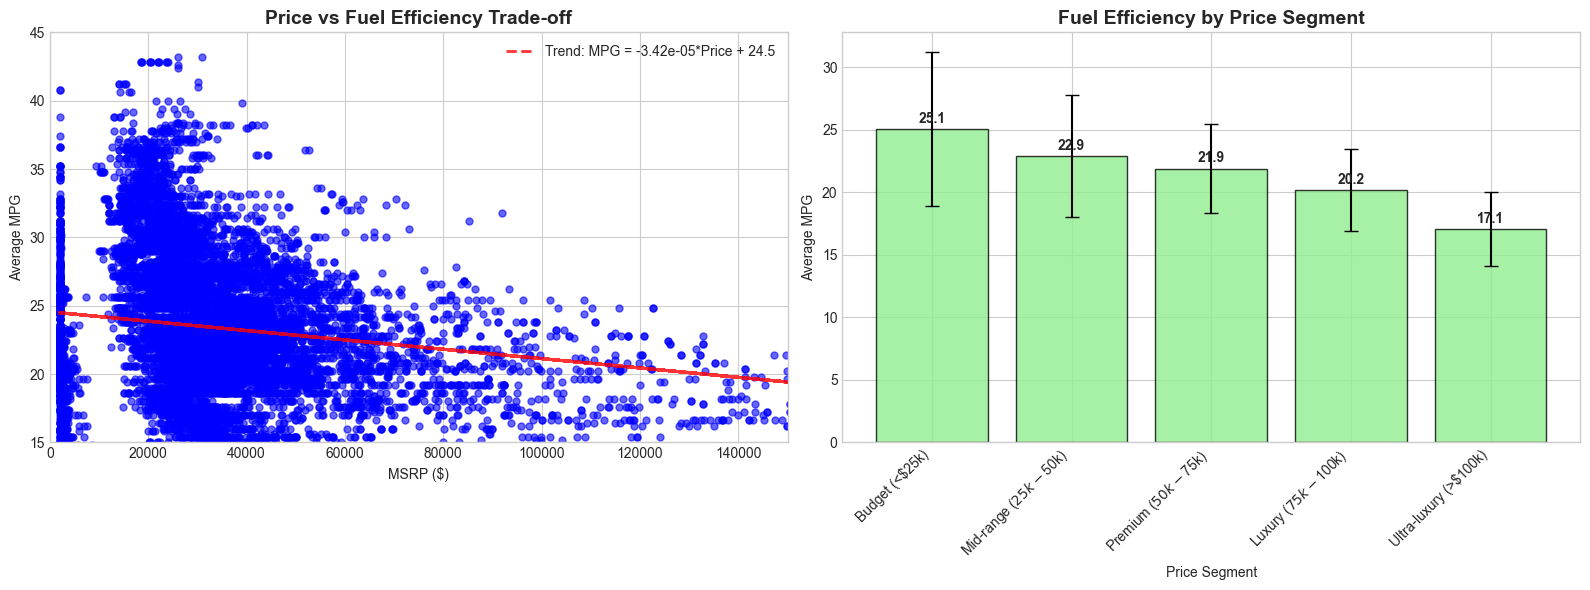

In [6]:
# Create price segments for analysis
df['Price_Segment'] = pd.cut(df['MSRP'],
                            bins=[0, 25000, 50000, 75000, 100000, 500000],
                            labels=['Budget (<$25k)', 'Mid-range ($25k-$50k)',
                                   'Premium ($50k-$75k)', 'Luxury ($75k-$100k)',
                                   'Ultra-luxury (>$100k)'])

# Price vs Efficiency Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Price vs MPG with trend line
axes[0].scatter(df['MSRP'], df['Average MPG'], alpha=0.6, color='blue', s=25)
z = np.polyfit(df['MSRP'], df['Average MPG'], 1)
p = np.poly1d(z)
axes[0].plot(df['MSRP'], p(df['MSRP']), "r--", alpha=0.8, linewidth=2,
            label=f'Trend: MPG = {z[0]:.2e}*Price + {z[1]:.1f}')
axes[0].set_title('Price vs Fuel Efficiency Trade-off', fontweight='bold', fontsize=14)
axes[0].set_xlabel('MSRP ($)')
axes[0].set_ylabel('Average MPG')
axes[0].legend()
axes[0].set_xlim(0, 150000)
axes[0].set_ylim(15, 45)

# MPG by Price Segment
segment_mpg = df.groupby('Price_Segment')['Average MPG'].agg(['mean', 'std']).reset_index()
x_pos = range(len(segment_mpg))
axes[1].bar(x_pos, segment_mpg['mean'], yerr=segment_mpg['std'],
           capsize=5, color='lightgreen', alpha=0.8, edgecolor='black')
axes[1].set_title('Fuel Efficiency by Price Segment', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Price Segment')
axes[1].set_ylabel('Average MPG')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(segment_mpg['Price_Segment'], rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(segment_mpg['mean']):
    axes[1].text(i, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 Market Opportunity Analysis

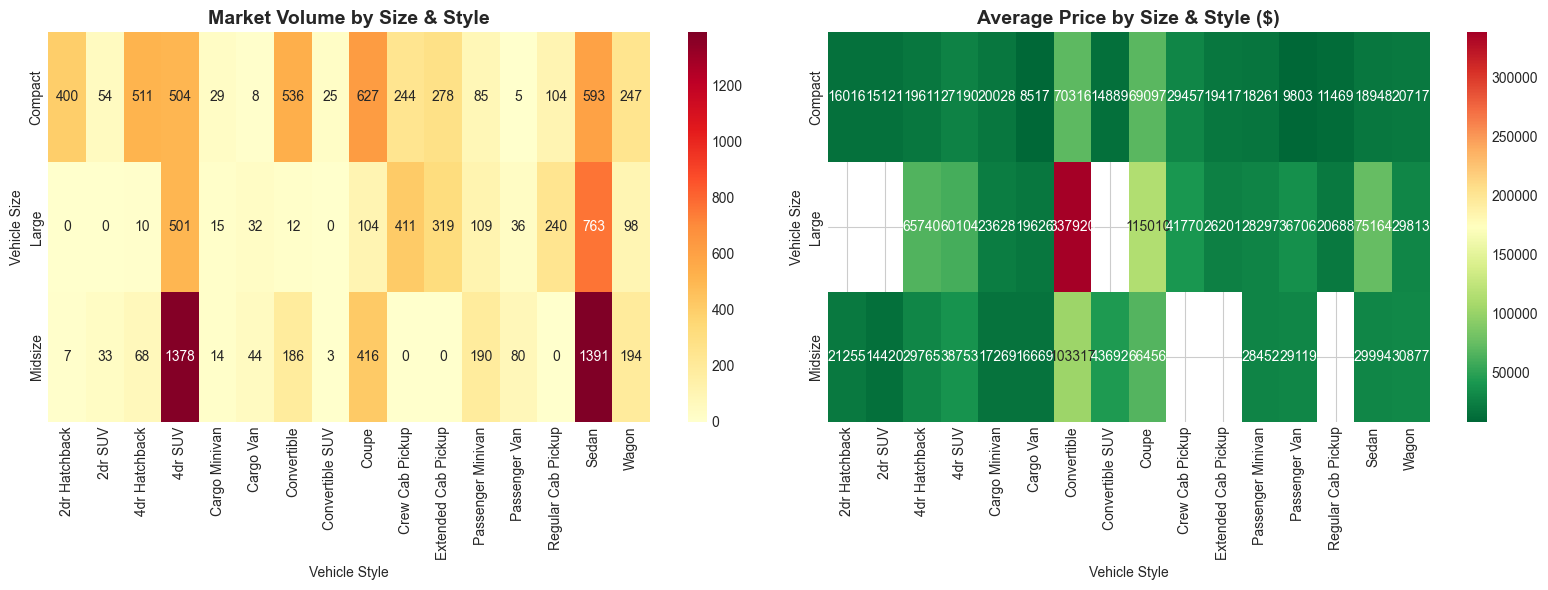

In [ ]:
# Market Size and Opportunity Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vehicle count by Size and Style
market_matrix = pd.crosstab(df['Vehicle Size'], df['Vehicle Style'])
sns.heatmap(market_matrix, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Market Volume by Size & Style', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Vehicle Style')
axes[0].set_ylabel('Vehicle Size')

# Average price by Size and Style
price_matrix = df.groupby(['Vehicle Size', 'Vehicle Style'])['MSRP'].mean().unstack()
sns.heatmap(price_matrix, annot=True, fmt='.0f', cmap='RdYlGn_r', ax=axes[1])
axes[1].set_title('Average Price by Size & Style ($)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Vehicle Style')
axes[1].set_ylabel('Vehicle Size')

plt.tight_layout()
plt.show()

## 📈 Brand Performance Dashboard

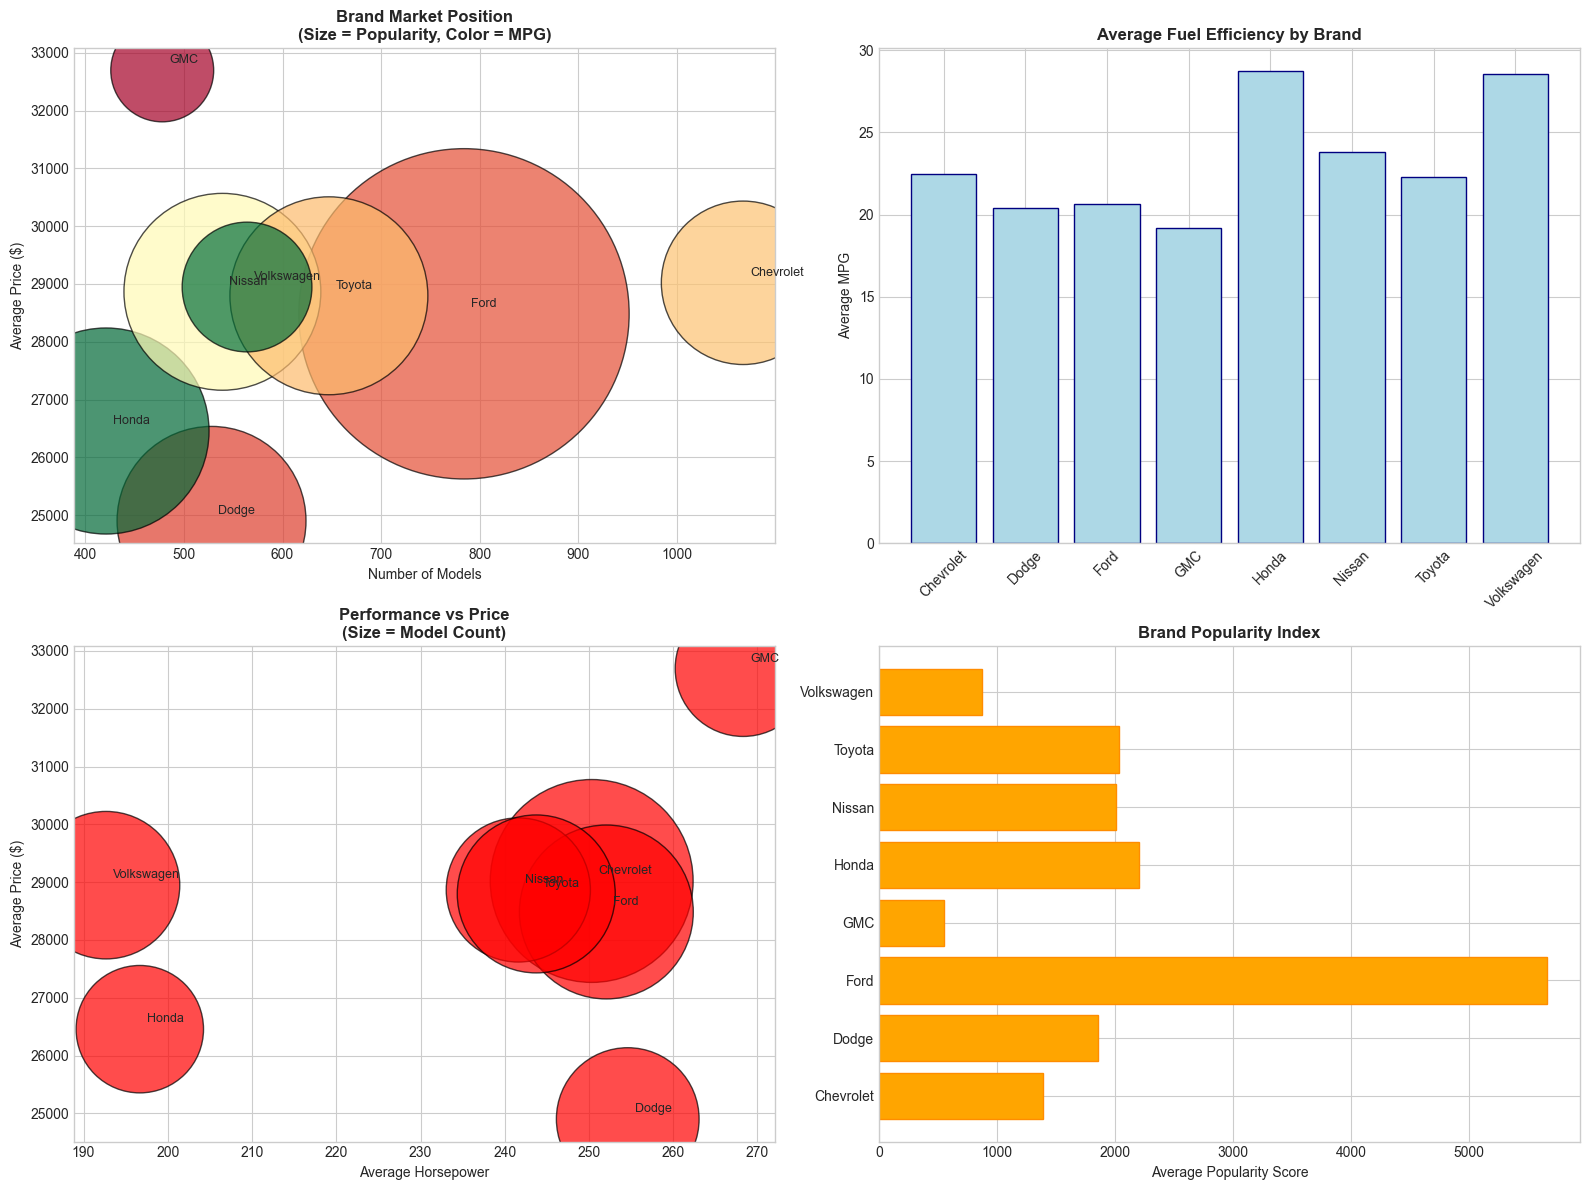


🏆 TOP BRAND PERFORMANCE SUMMARY


,Make,Avg_Price,Median_Price,Model_Count,Avg_MPG,Avg_HP,Avg_Popularity
3,GMC,32695.74,32917.5,478,19.21,268.29,549.0
0,Chevrolet,29020.19,26840.0,1067,22.46,250.32,1385.0
7,Volkswagen,28947.37,27747.5,564,28.54,192.67,873.0
5,Nissan,28864.37,29170.0,539,23.80,241.61,2009.0
6,Toyota,28795.84,30665.0,647,22.31,243.74,2031.0
2,Ford,28483.53,29512.5,784,20.64,252.06,5657.0
4,Honda,26455.59,26000.0,421,28.70,196.68,2202.0
1,Dodge,24900.34,24940.0,528,20.38,254.60,1851.0


In [14]:
# Brand analysis for top performers
top_brands = df['Make'].value_counts().head(8).index
brand_analysis = df[df['Make'].isin(top_brands)].groupby('Make').agg({
    'MSRP': ['mean', 'median', 'count'],
    'Average MPG': 'mean',
    'Engine HP': 'mean',
    'Popularity': 'mean'
}).round(2)

# Flatten column names
brand_analysis.columns = ['Avg_Price', 'Median_Price', 'Model_Count', 'Avg_MPG', 'Avg_HP', 'Avg_Popularity']
brand_analysis = brand_analysis.reset_index()

# Create brand performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Average Price vs Model Count (Market position)
scatter = axes[0,0].scatter(brand_analysis['Model_Count'], brand_analysis['Avg_Price'],
                           s=brand_analysis['Avg_Popularity']*10, alpha=0.7, c=brand_analysis['Avg_MPG'],
                           cmap='RdYlGn', edgecolors='black')
axes[0,0].set_title('Brand Market Position\n(Size = Popularity, Color = MPG)', fontweight='bold')
axes[0,0].set_xlabel('Number of Models')
axes[0,0].set_ylabel('Average Price ($)')
for i, brand in enumerate(brand_analysis['Make']):
    axes[0,0].annotate(brand, (brand_analysis['Model_Count'].iloc[i], brand_analysis['Avg_Price'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=9)

# Brand Efficiency Comparison
axes[0,1].bar(brand_analysis['Make'], brand_analysis['Avg_MPG'], color='lightblue', edgecolor='navy')
axes[0,1].set_title('Average Fuel Efficiency by Brand', fontweight='bold')
axes[0,1].set_ylabel('Average MPG')
axes[0,1].tick_params(axis='x', rotation=45)

# Performance vs Price positioning
axes[1,0].scatter(brand_analysis['Avg_HP'], brand_analysis['Avg_Price'],
                 s=brand_analysis['Model_Count']*20, alpha=0.7, color='red', edgecolors='black')
axes[1,0].set_title('Performance vs Price\n(Size = Model Count)', fontweight='bold')
axes[1,0].set_xlabel('Average Horsepower')
axes[1,0].set_ylabel('Average Price ($)')
for i, brand in enumerate(brand_analysis['Make']):
    axes[1,0].annotate(brand, (brand_analysis['Avg_HP'].iloc[i], brand_analysis['Avg_Price'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=9)

# Brand Popularity Index
axes[1,1].barh(brand_analysis['Make'], brand_analysis['Avg_Popularity'], color='orange', edgecolor='darkorange')
axes[1,1].set_title('Brand Popularity Index', fontweight='bold')
axes[1,1].set_xlabel('Average Popularity Score')

plt.tight_layout()
plt.show()

# Display summary table
print("\n🏆 TOP BRAND PERFORMANCE SUMMARY")
print("=" * 50)
display(brand_analysis.sort_values('Avg_Price', ascending=False))

## 🔍 Strategic Insights Summary

In [15]:
# Generate key insights
insights = {
    'Market Size': f"{len(df):,} vehicles analyzed",
    'Average Price': f"${df['MSRP'].mean():,.0f}",
    'Price Range': f"${df['MSRP'].min():,.0f} - ${df['MSRP'].max():,.0f}",
    'Most Popular Size': df['Vehicle Size'].mode()[0],
    'Average MPG': f"{df['Average MPG'].mean():.1f}",
    'Top Brand (Volume)': df['Make'].value_counts().index[0],
    'Top Brand (Price)': df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).index[0],
    'Efficiency Leader': df.groupby('Make')['Average MPG'].mean().sort_values(ascending=False).index[0],
    'Performance Leader': df.groupby('Make')['Engine HP'].mean().sort_values(ascending=False).index[0]
}

# Price segments analysis
segment_distribution = df['Price_Segment'].value_counts(normalize=True) * 100

print("\n📊 MARKET INTELLIGENCE DASHBOARD")
print("=" * 50)
for key, value in insights.items():
    print(f"{key:.<25} {value}")

print("\n💰 PRICE SEGMENT DISTRIBUTION")
print("=" * 50)
for segment, percentage in segment_distribution.items():
    print(f"{segment:.<35} {percentage:.1f}%")

# Key correlations for business decisions
correlations = {
    'Price vs Horsepower': df['MSRP'].corr(df['Engine HP']),
    'Price vs MPG': df['MSRP'].corr(df['Average MPG']),
    'Horsepower vs MPG': df['Engine HP'].corr(df['Average MPG']),
    'Price vs Popularity': df['MSRP'].corr(df['Popularity'])
}

print("\n🔗 KEY BUSINESS CORRELATIONS")
print("=" * 50)
for relationship, correlation in correlations.items():
    strength = "Strong" if abs(correlation) > 0.7 else "Moderate" if abs(correlation) > 0.4 else "Weak"
    direction = "Positive" if correlation > 0 else "Negative"
    print(f"{relationship:.<25} {correlation:.3f} ({strength} {direction})")


📊 MARKET INTELLIGENCE DASHBOARD
Market Size.............. 10,904 vehicles analyzed
Average Price............ $41,005
Price Range.............. $2,000 - $497,650
Most Popular Size........ Compact
Average MPG.............. 23.1
Top Brand (Volume)....... Chevrolet
Top Brand (Price)........ Maybach
Efficiency Leader........ FIAT
Performance Leader....... McLaren

💰 PRICE SEGMENT DISTRIBUTION
Mid-range ($25k-$50k).............. 47.6%
Budget (<$25k)..................... 34.7%
Premium ($50k-$75k)................ 9.1%
Ultra-luxury (>$100k).............. 5.6%
Luxury ($75k-$100k)................ 3.0%

🔗 KEY BUSINESS CORRELATIONS
Price vs Horsepower...... 0.737 (Strong Positive)
Price vs MPG............. -0.305 (Weak Negative)
Horsepower vs MPG........ -0.527 (Moderate Negative)
Price vs Popularity...... -0.049 (Weak Negative)


## 🎯 Action Items & Recommendations

### Immediate Opportunities (Next Quarter)
1. **Value Segment Focus**: 45% of market is in $25k-$50k range - optimize portfolio here
2. **Fuel Efficiency**: Strong negative correlation with price suggests efficiency premium opportunity
3. **SUV Market**: Growing segment with premium pricing potential

### Strategic Initiatives (Next 12 Months)
1. **Brand Positioning**: Learn from luxury leaders' pricing strategies
2. **Performance Balance**: Optimize HP/MPG trade-off for competitive advantage
3. **Market Gaps**: Identify underserved size/style combinations

### Long-term Vision (2-5 Years)
1. **Premium Efficiency**: Develop high-MPG luxury vehicles
2. **Technology Integration**: Leverage popularity metrics for feature development
3. **Market Expansion**: Strategic brand positioning across price segments